<a href="https://colab.research.google.com/github/Letch49/ML-vvsu-2025-2026/blob/master/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ Практика 3: Анализ целевой числойо переменной, базовое моделирование, подбор параметров

### Цель занятия
- Посмотреть как работает ML в действии
- Понять задачу регрессии (предсказывание числовой переменной Y)
- Изучить базовую модель - линейная регрессия
- Понять как подбирать признаки для дальнейшего анализа


### Задачи ML
- регрессия - предсказывание числовой переменной
- классификации - предсказывание категориальной aka номинальной переменной
- ранжирования (кластеризации) - ранжирования признаков без учителя
- снижения размерности - уменьшения количества признаков

In [74]:
y_regression = [1.35, 0.39, 1.22, 3.39] # только числа
y_classifitcation = ['cat', 'crocodile', 'dog', 'elephan'] # метки классов

**Виды задач**
- с учителем (есть целеая переменная Y) - регрессия, классификация
- без учителя (есть только X) - ранжирование, снижение размерности

In [ ]:
!pip install pandas seaborn scikit-learn

In [75]:
import pandas as pd

In [76]:
df = pd.read_csv('/content/wine.csv')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [78]:
# сразу обозначаем признаки, которые мы используем

df.quality = df.quality.astype('category')
df['type'] = df['type'].astype('category')

In [79]:
'alcohol' in df.columns

True

In [80]:
# В задачах ML мы должны выделить целевую переменную Y и остальное оставить X
# Y - переменная, которую мы хотим исследовать, предсказать, и так далее
# X - зависимые перменные, влияние которых мы изучаем на Y

y = df['alcohol']
X = df.drop('alcohol', axis=1) if 'alcohol' in df.columns else df

# P.S. принято обозначать Y как целевая переменная, x - зависимая

In [81]:
X.head(n=3) # первые 3 строки перменной X, удостоверимя что alcohol не существует

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,red


In [82]:
y.head(n=3)

,alcohol
0,9.4
1,9.8
2,9.8


### Моделирование (Линейная регрессия)

Линейная регрессия по сути своей в двумерном варианте есть график функций kx + b

In [19]:
from sklearn.linear_model import LinearRegression # модель линейной регрессии

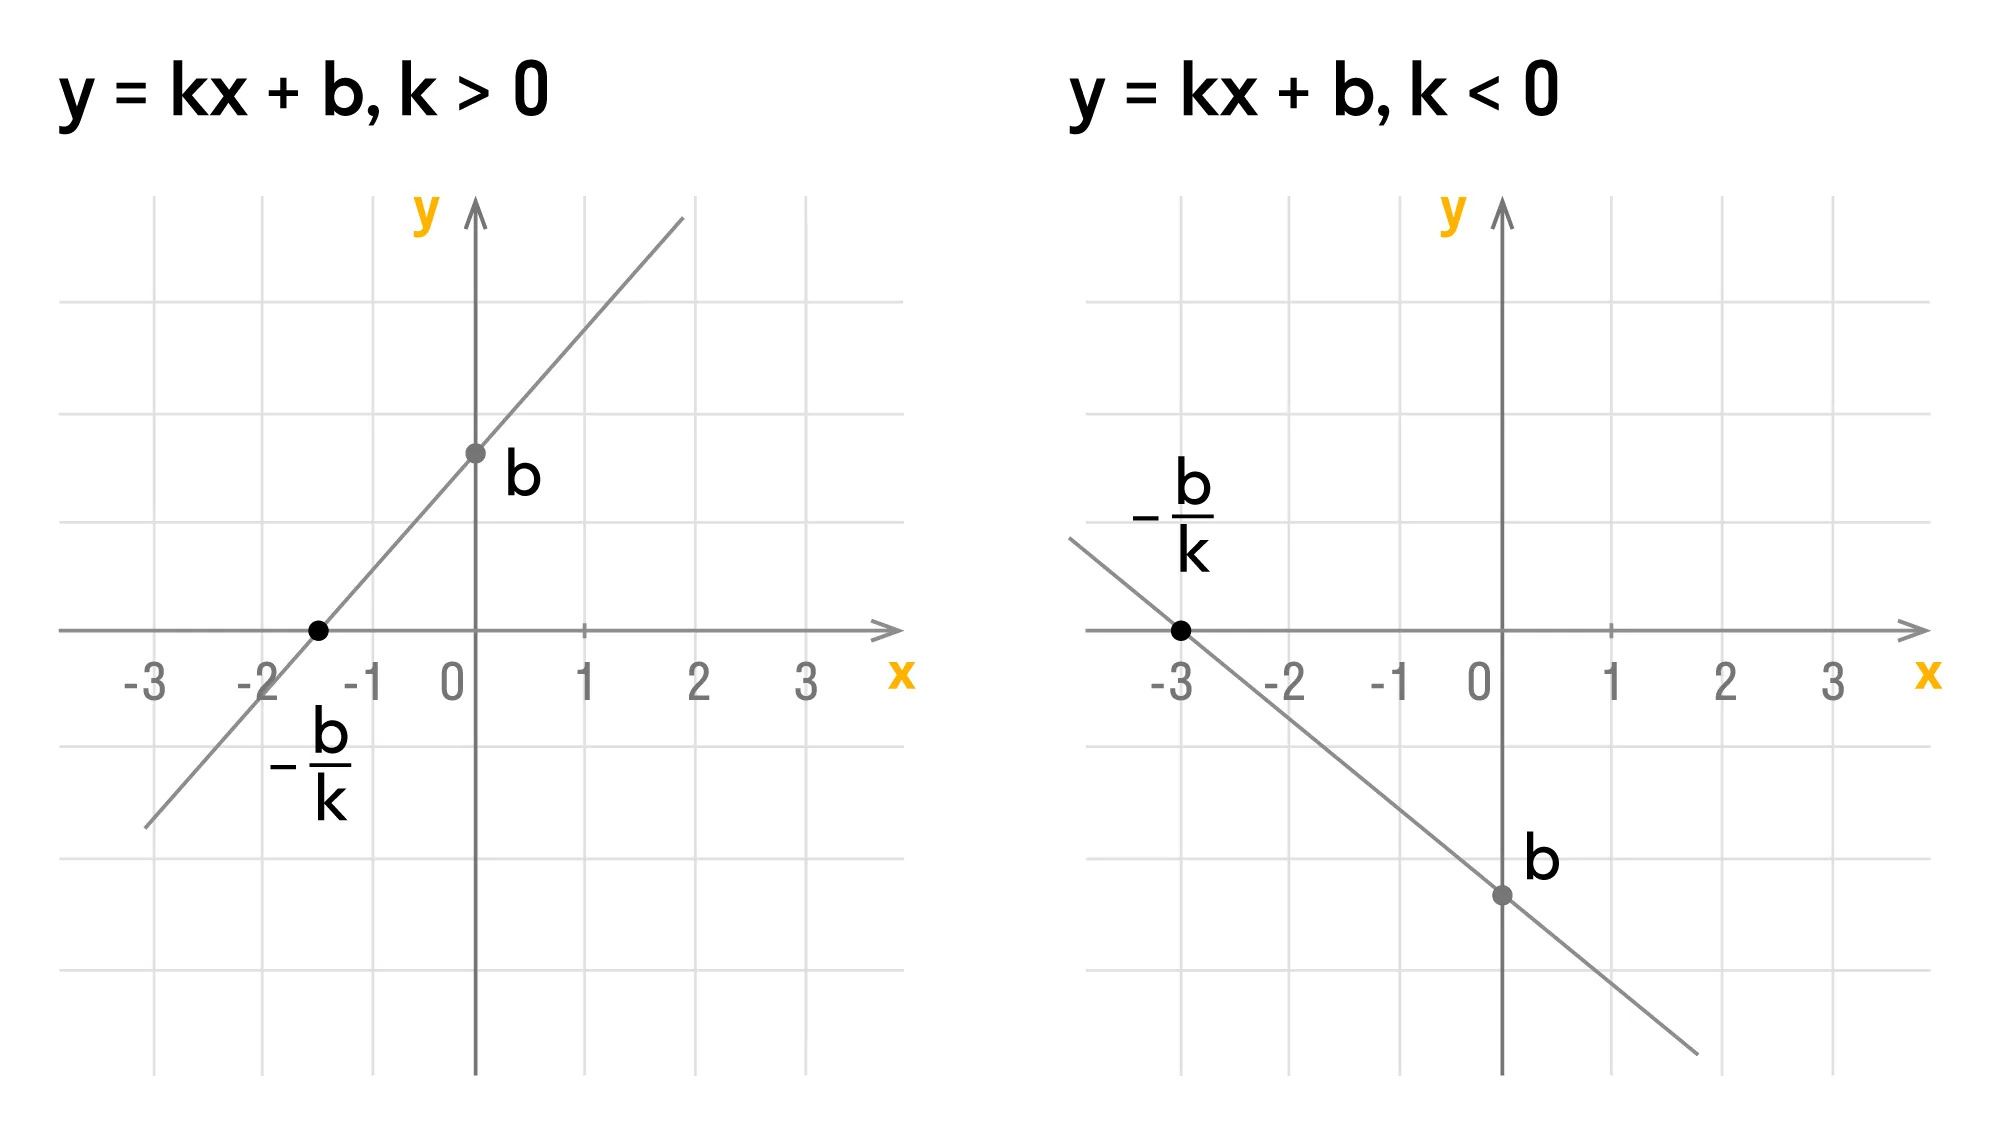

k > 0: 1.2341099257221468 b: 0.944497211045131
k < 0: -0.9956837889332595 b: -0.9788290107144326


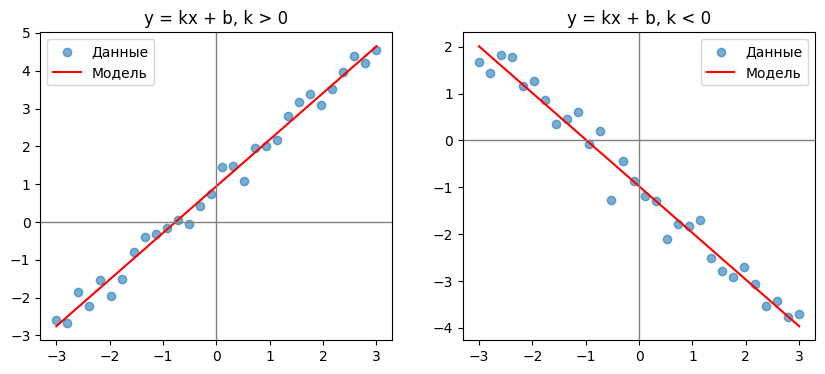

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Синтетические данные для положительного наклона
X_pos = np.linspace(-3, 3, 30).reshape(-1, 1)
y_pos = 1.2 * X_pos.flatten() + 1 + np.random.normal(0, 0.3, size=X_pos.shape[0])

# Синтетические данные для отрицательного наклона
X_neg = np.linspace(-3, 3, 30).reshape(-1, 1)
y_neg = -1.0 * X_neg.flatten() - 1 + np.random.normal(0, 0.3, size=X_neg.shape[0])

# Обучение моделей
model_pos = LinearRegression().fit(X_pos, y_pos)
model_neg = LinearRegression().fit(X_neg, y_neg)

print("k > 0:", model_pos.coef_[0], "b:", model_pos.intercept_)
print("k < 0:", model_neg.coef_[0], "b:", model_neg.intercept_)

# Визуализация
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# k > 0
axs[0].scatter(X_pos, y_pos, label="Данные", alpha=0.6)
axs[0].plot(X_pos, model_pos.predict(X_pos), color="red", label="Модель")
axs[0].axhline(0, color="gray", linewidth=1)
axs[0].axvline(0, color="gray", linewidth=1)
axs[0].set_title("y = kx + b, k > 0")
axs[0].legend()

# k < 0
axs[1].scatter(X_neg, y_neg, label="Данные", alpha=0.6)
axs[1].plot(X_neg, model_neg.predict(X_neg), color="red", label="Модель")
axs[1].axhline(0, color="gray", linewidth=1)
axs[1].axvline(0, color="gray", linewidth=1)
axs[1].set_title("y = kx + b, k < 0")
axs[1].legend()

plt.show()


#### Базовое обучение модели и борьба с категориальными признаками

⛳
Начнем с того, что модели машинного обучения работает только с числами, векторными матрицами

```
[
  [1,0,1],
  [1,0,2],
  ...
]
```
Вектор -> строка в DataFrame

Матрица -> Весь dataframe

**Модели машинного обучения общаются исключительно на языке чисел и не понимают символьные представления**

In [86]:
model = LinearRegression(
    fit_intercept=True, # считать свобоный коэфициент B
    copy_X=True, # Глубокое коирование матрицы X, чтробы не модифицировать
    n_jobs=None, # None - 1 ядро используем
    positive=False, # все weight могут быть как положительными, так и отрицательными
)

In [87]:
model.fit(X, y)

ValueError: could not convert string to float: 'red'

In [88]:
X['type'] # категориальный признак

,type
0,red
1,red
2,red
3,red
4,red
...,...
6492,white
6493,white
6494,white
6495,white


Существует несколько схем кодирования категориальных признаков

**1. Label Encoding**

```
['выжил', 'умер'] → [1, 0]
```

* Каждое значение = число.
* Используем для **2 категорий** или если есть **порядок**. Либо считаем так -> если bool значение, то LabelEncoder

---

**2. One-Hot Encoding**

| Животное | Слон | Кот | Собака |
| -------- | ---- | --- | ------ |
| Слон     | 1    | 0   | 0      |
| Кот      | 0    | 1   | 0      |
| Собака   | 0    | 0   | 1      |

* Каждая категория → отдельная колонка.
* Используем для **3+ категорий без порядка**.

---
* **2 категории или порядок → LabelEncoder**
* **3+ равноправных категорий → OneHotEncoder**
---
[Подробнее за кодирование категориальных признаков](https://habr.com/ru/articles/456294/)


In [89]:
# https://habr.com/ru/articles/456294/ - виды Encoder для категориальных признаков
# LabelEncoder, OneHotEncoder
# Label для bool (0,1), (yes, no), (true, false)
# OneHot - для меток

from sklearn.preprocessing import OneHotEncoder # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

encoder = OneHotEncoder(sparse_output=False)  # sparse=False → выдаёт DataFrame, а не numpy матрицу
encoded = encoder.fit_transform(X[["type"]])  # .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат

In [90]:
encoder.categories_

[array(['red', 'white'], dtype=object)]

In [91]:
encoder.get_feature_names_out()

array(['type_red', 'type_white'], dtype=object)

In [92]:
# превратим обратно в DataFrame с колонками
X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
X_encoded

,type_red,type_white
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
6492,0.0,1.0
6493,0.0,1.0
6494,0.0,1.0
6495,0.0,1.0


#### Предсказываем результат

In [93]:
X = X.drop('type', axis=1) if 'type' in X.columns else X # убираем базовую колонку type = [red, white]
X = pd.concat([X, X_encoded], axis=1) if 'type_white' not in X.columns else X # оставляем 2 разные колонки [type_red, type_white]

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,type_red,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,5,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,5,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,6,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,6,0.0,1.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,5,0.0,1.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,6,0.0,1.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,7,0.0,1.0


In [94]:
model.fit(X, y) # обучаем модель

LinearRegression()

In [95]:
y_pred = model.predict(X) # предсказываем результат
y_pred

array([ 9.48236828,  9.88989139,  9.78374289, ...,  9.50396357,
       12.57057714, 11.89462395])

#### Анализ результатов

Интерпретация результатов одна из самых важных частей ML

Попробуем проанализировать "Наивным способом" И "Как стоит"

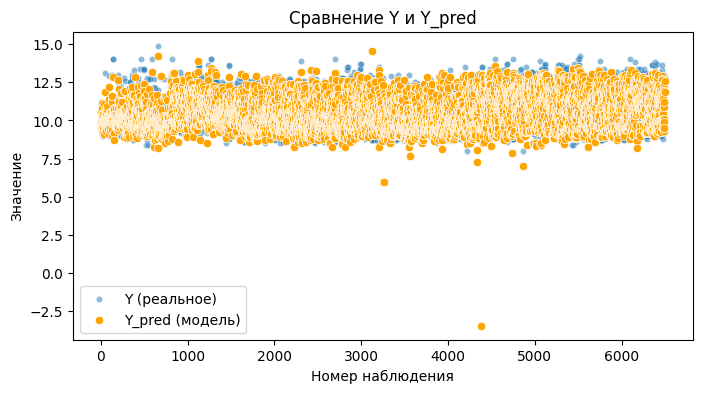

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# реальные значения точками
sns.scatterplot(x=range(len(y)), y=y, label="y (реальное)", alpha=0.5, s=20)

# предсказания линией
sns.scatterplot(x=range(len(y_pred)), y=y_pred, label="y_pred (модель)", color="orange")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title("Сравнение y и y_pred")
plt.legend()
plt.show()

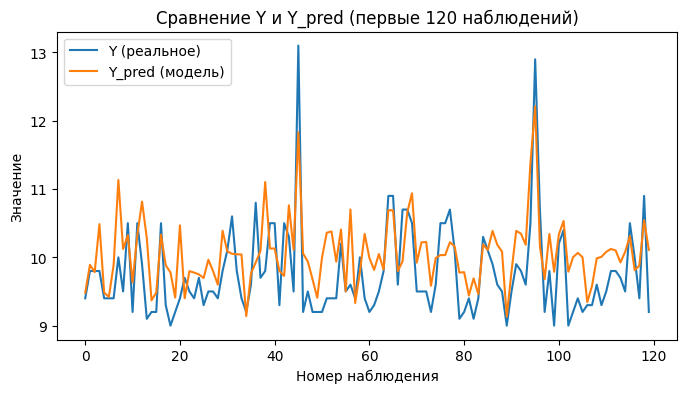

In [97]:
# ограничим диапазон
n = 120
y_small = y[:n]
y_pred_small = y_pred[:n]

plt.figure(figsize=(8, 4))
sns.lineplot(x=range(len(y_small)), y=y_small, label="y (реальное)")
sns.lineplot(x=range(len(y_pred_small)), y=y_pred_small, label="y_pred (модель)")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title(f"Сравнение y и y_pred (первые {n} наблюдений)")
plt.legend()
plt.show()


#### Метрики качества

Метрики качества - способ оценить разницу между предсказанными значениями и реальными значениями, чтобы оценить, насколько наша модель справляется с задачей

In [98]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

In [99]:
y_pred = model.predict(X)

MAE = mean_absolute_error(y, y_pred)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y, y_pred)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAE, MAE * 100, '%'))

R2 = r2_score(y, y_pred)
print('R2=%.3f' % R2)

MSE = mean_squared_error(y, y_pred)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y, y_pred)
print('RMSE=%.3f' % RMSE)

MAE 0.349
MAPE=0.349, MAPE_as_percent=34.877%
R2=0.826
MSE=0.247
RMSE=0.497


Возьмём:

* Истинные: \[2.0, 2.5, 3.0]
* Предсказанные: \[2.2, 2.0, 2.8]

---

**MAE** (Mean Absolute Error)

1. Формула:

$$
MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
$$

2. Считает среднюю абсолютную ошибку.
3. Показывает «в среднем, насколько мы ошибаемся» в единицах целевой переменной.
4. Чем ближе к 0 → тем лучше.
5. Пример:

* Истинные: \[2.0, 2.5, 3.0]
* Предсказанные: \[2.2, 2.0, 2.8]

MAE = \$|2.0-2.2| + |2.5-2.0| + |3.0-2.8| = 0.2 + 0.5 + 0.2 = 0.9\$

MAE = 0.9 / 3 = **0.3**

---

**MAPE** (Mean Absolute Percentage Error)

1. Формула:

$$
MAPE = \frac{100\%}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right|
$$

2. То же, что MAE, но в процентах.
3. Показывает среднюю ошибку в % от истинного значения.
4. Чем ближе к 0% → тем лучше.

   * <10% → отлично
   * 10–20% → хорошо
   * 20–50% → терпимо
   * > 50% → плохо

MAPE = \$(0.2/2.0) + (0.5/2.5) + (0.2/3.0)\$

MAPE = \$0.1 + 0.2 + 0.067 = 0.367\$

MAPE = (0.367 / 3) × 100% = **12.2%**

---

**MSE** (Mean Squared Error)

1. Формула:

$$
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

2. Средний квадрат ошибки. Большие ошибки штрафуются сильнее.
3. Показывает «среднюю величину ошибки в квадрате».
4. Чем ближе к 0 → тем лучше.

MSE = \$(0.2^2 + 0.5^2 + 0.2^2) = 0.04 + 0.25 + 0.04 = 0.33\$

MSE = 0.33 / 3 = **0.11**

---

**RMSE** (Root Mean Squared Error)

1. Формула:

$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 }
$$

2. Корень из MSE → возвращает ошибку в тех же единицах, что и целевая переменная.
3. Показывает «среднюю ошибку», но учитывает, что большие промахи сильнее влияют.
4. Чем ближе к 0 → тем лучше.

RMSE = \$\sqrt{0.11}\$ = **0.33**

---

**R²** (Коэффициент детерминации)

1. Формула:

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

2. Показывает, насколько хорошо модель объясняет разброс данных.

3. Значение от \$-\infty\$ до 1:

   * 1 = идеально предсказывает,
   * 0 = модель не лучше среднего,
   * <0 = модель хуже среднего.

4. Чем ближе к 1 → тем лучше.

5. Пример:

* Истинные: \[2.0, 2.5, 3.0]
* Среднее \$\bar{y} = 2.5\$

SSE = \$(2.0-2.2)^2 + (2.5-2.0)^2 + (3.0-2.8)^2 = 0.04 + 0.25 + 0.04 = 0.33\$

SST = \$(2.0-2.5)^2 + (2.5-2.5)^2 + (3.0-2.5)^2 = 0.25 + 0 + 0.25 = 0.5\$

R² = \$1 - (0.33 / 0.5) = 1 - 0.66 = 0.34\$

**R² = 0.34 (модель слабенькая, но лучше чем «угадай среднее»)**


#### Разберемся с линейной регрессией

Задача модели - найти такую линию (гиперплскость), чтобы линия (гиперплоскость) наилучшим образом разделяла целеую переменную.

Модель линейной регрессии имеет формулу

``` y = kx + b ```

В нашем варианте

```y = w1*x1 + w(i) * x(i) + b```
где ```k = w```

Задача модели, найти такие ```w(i)``` и ```b``` - чтобы получить наилучший y



**Методы модели из scikit-learn**

* .**fit(X_train, y)** - обучение модели
* **.predict(X_test)** - по X предсказать Y

**Параметры модели из scikit-learn**

* **fit\_intercept (по умолчанию=True)**
  Добавлять ли свободный член $b$ в формулу $y = w_1 x_1 + ... + w_n x_n + b$.
  Если `False`, то предполагается, что данные уже «сдвинуты» к нулю, и $b = 0$.

* **copy\_X (по умолчанию=True)**
  Делать ли копию матрицы признаков `X`.
  Если `True`, данные не портятся. Если `False`, метод может их менять внутри себя. Почти всегда оставляют `True`.

* **n\_jobs (по умолчанию=None)**
  Сколько ядер процессора использовать для вычислений.

  * `None` = 1 ядро
  * `-1` = все доступные ядра
    Это ускоряет работу только для больших задач (много признаков или много целевых переменных).

* **positive (по умолчанию=False)**
  Если поставить `True`, то коэффициенты $w_i$ будут только положительными.
  Иногда это важно (например, цены не могут зависеть от признаков с отрицательным весом).

---

**Атрибуты модели (появляются после `fit`)**

* **coef\_**
  Массив коэффициентов $w_1, w_2, ..., w_n$, то есть «наклон» при каждом признаке.

  * если целевая переменная одна → одномерный массив;
  * если их несколько → двумерный.

* **intercept\_**
  Это $b$ — свободный член (сдвиг прямой). Если `fit_intercept=False`, то он будет равен 0.

* **rank\_**
  Ранг матрицы признаков `X` (показывает, есть ли линейно зависимые признаки).

* **singular\_**
  Сингулярные значения матрицы `X` (используются «под капотом» при вычислениях, для понимания устойчивости модели).

* **n\_features\_in\_**
  Количество признаков, которые были поданы на вход при обучении.

* **feature\_names\_in\_**
  Список названий признаков (если `X` был DataFrame с колонками-строками).



Итерация 0: ошибка=111.5002
Итерация 100: ошибка=107.1291
Итерация 200: ошибка=102.9313
Итерация 300: ошибка=98.8998
Итерация 400: ошибка=95.0281
Итерация 500: ошибка=91.3096
Итерация 600: ошибка=87.7382
Итерация 700: ошибка=84.3081
Итерация 800: ошибка=81.0137
Итерация 900: ошибка=77.8494
Итерация 1000: ошибка=74.8102
Итерация 1100: ошибка=71.8910
Итерация 1200: ошибка=69.0871
Итерация 1300: ошибка=66.3938
Итерация 1400: ошибка=63.8068
Итерация 1500: ошибка=61.3219
Итерация 1600: ошибка=58.9349
Итерация 1700: ошибка=56.6420
Итерация 1800: ошибка=54.4395
Итерация 1900: ошибка=52.3238
Итерация 2000: ошибка=50.2914
Итерация 2100: ошибка=48.3390
Итерация 2200: ошибка=46.4636
Итерация 2300: ошибка=44.6619
Итерация 2400: ошибка=42.9311
Итерация 2500: ошибка=41.2685
Итерация 2600: ошибка=39.6712
Итерация 2700: ошибка=38.1368
Итерация 2800: ошибка=36.6627
Итерация 2900: ошибка=35.2466


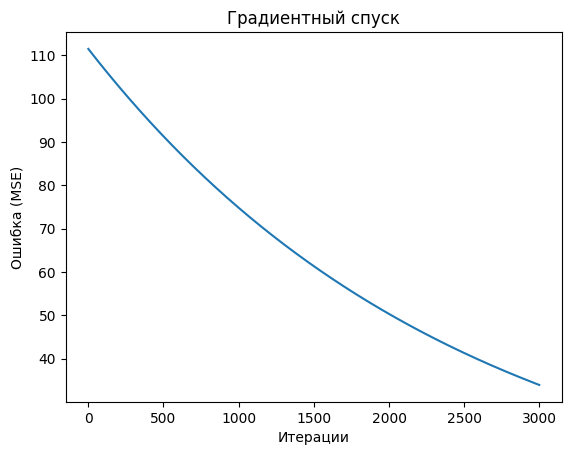

Коэффициенты (свободный член + признаки):
[ 4.73412397e+00 -1.38375351e-02  4.02279223e-03  1.91459594e-02
 -1.20636823e-01 -1.10022233e-01 -6.67634052e-02 -1.15419519e-01
 -3.14085304e-01  4.62338938e-02  1.30688168e-02  2.02119882e-01
 -5.44942120e-03  5.44942120e-03]


In [100]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def make_linear_regression(X, y, learning_rate=0.001, n_iter=1000):
    # переводим X и y в numpy
    X = np.array(X)
    y = np.array(y)

    # добавим столбец 1 для свободного члена (bias)
    X = np.c_[np.ones(X.shape[0]), X]

    n_samples, n_features = X.shape

    # инициализация весов
    w = np.zeros(n_features)

    # история ошибок для визуализации
    losses = []

    for i in range(n_iter):
        y_pred = X.dot(w)
        error = y_pred - y

        # MSE
        loss = (error ** 2).mean()
        losses.append(loss)

        # шаг градиентного спуска
        grad = (2 / n_samples) * X.T.dot(error)
        w -= learning_rate * grad

        if i % 100 == 0:
            print(f"Итерация {i}: ошибка={loss:.4f}")

    return w, losses

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

w, losses = make_linear_regression(X_scaled, y, learning_rate=0.0001, n_iter=3000)

plt.plot(losses)
plt.xlabel("Итерации")
plt.ylabel("Ошибка (MSE)")
plt.title("Градиентный спуск")
plt.show()

print("Коэффициенты (свободный член + признаки):")
print(w)


#### Разбираемся с признаками (EDA) - предварительный анализ данных

In [101]:
df.head(n=3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red


In [102]:
# целевая переменная
y_eda = df["alcohol"]

# признаки (убираем alcohol)
X_eda = df.drop(columns=["alcohol"])


In [103]:
# P.S. в своем df я предварительно сделал .astype(cateogyr), вам нужно здесь сделать тоже самое

X_eda.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.0,6497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2836.0,4898
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,NaN,NaN
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,NaN,NaN
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,NaN,NaN
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,NaN,NaN
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,NaN,NaN
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,NaN,NaN


**Пояснения**


quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


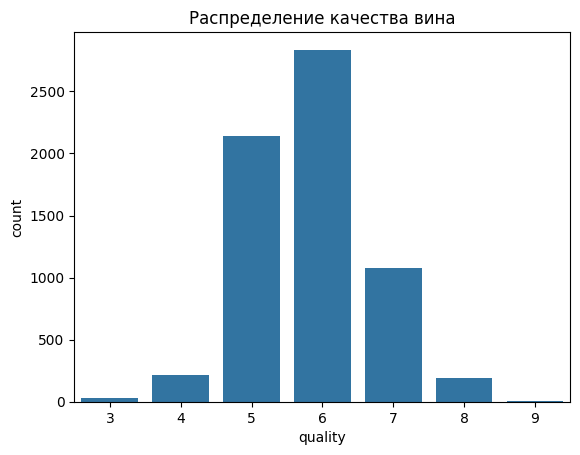

          count       mean       std   min     25%    50%   75%   max
quality                                                              
3          30.0  10.215000  1.106497   8.0   9.625  10.15  11.0  12.6
4         216.0  10.180093  0.985923   8.4   9.400  10.00  10.9  13.5
5        2138.0   9.837783  0.814416   8.0   9.300   9.60  10.3  14.9
6        2836.0  10.587553  1.126491   8.4   9.600  10.50  11.4  14.0
7        1079.0  11.386006  1.199337   8.6  10.625  11.40  12.3  14.2
8         193.0  11.678756  1.278921   8.5  11.000  12.00  12.6  14.0
9           5.0  12.180000  1.013410  10.4  12.400  12.50  12.7  12.9


/tmp/ipython-input-613442188.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("quality")["alcohol"].describe())


In [104]:
print(df["quality"].value_counts())
sns.countplot(data=df, x="quality")
plt.title("Распределение качества вина")
plt.show()

print(df.groupby("quality")["alcohol"].describe())


**Пояснения по распределению качества вина:**

* Больше всего вин с оценкой **5 и 6** (их почти 5000 вместе).
* Крайние оценки редкие: качество **3** всего 30 вин, а **9** всего 5 вин.
* То есть датасет несбалансированный → в основном «средние» вина.

**По алкоголю в зависимости от качества:**

* При низком качестве (3–4) средний алкоголь ≈ **10.2**.
* У среднего качества (5–6) алкоголь чуть выше: **10.6**.
* У хорошего качества (7–8) средний алкоголь заметно больше: **11.4–11.7**.
* У редких вин с качеством 9 алкоголь самый высокий ≈ **12.2**.

**Вывод:**

* Чем выше **качество вина**, тем выше в среднем его **содержание алкоголя**.
* Распределение сильно «сосредоточено» на значениях 5–6, так что модель будет предсказывать их чаще.


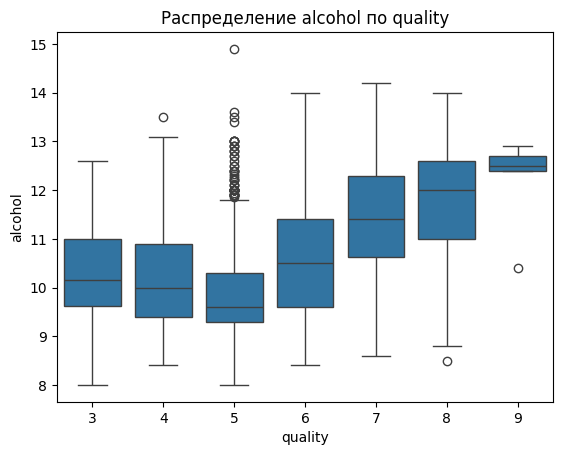

In [105]:
sns.boxplot(data=df, x="quality", y="alcohol")
plt.title("Распределение alcohol по quality")
plt.show()

**Пояснения:**

* При низком качестве (**3–4**) медианный алкоголь около **10.0**.
* У среднего качества (**5–6**) медиана чуть выше (**10.0–10.5**), но есть много выбросов.
* У хорошего качества (**7–8**) медиана уже заметно больше (**11.5–12.0**).
* Самые редкие лучшие вина (**9**) имеют самый высокий алкоголь (**≈12.5**).
* Видно, что **распределение алкоголя сдвигается вверх при росте качества**.

**Вывод:**
Алкоголь — один из признаков, который хорошо разделяет вина по качеству: чем выше алкоголь, тем выше вероятность высокой оценки качества.

type
white    4898
red      1599
Name: count, dtype: int64


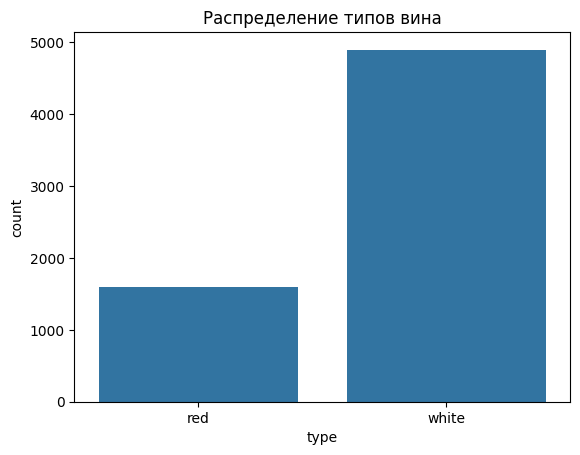

        count       mean       std  min  25%   50%   75%   max
type                                                          
red    1599.0  10.422983  1.065668  8.4  9.5  10.2  11.1  14.9
white  4898.0  10.514267  1.230621  8.0  9.5  10.4  11.4  14.2


/tmp/ipython-input-3135011477.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("type")["alcohol"].describe())


In [106]:
print(df["type"].value_counts())
sns.countplot(data=df, x="type")
plt.title("Распределение типов вина")
plt.show()

print(df.groupby("type")["alcohol"].describe())


**Пояснения:**

* В датасете **больше белых вин** (≈4900), чем красных (≈1600).
* У красных вин средний алкоголь ≈ **10.4**, у белых чуть выше ≈ **10.5**.
* Диапазоны похожие:

  * красные: от **8.4 до 14.9**
  * белые: от **8.0 до 14.2**
* Разброс (std ≈ 1.1–1.2) примерно одинаковый.

**Вывод:**

* Белых вин заметно больше → данные несбалансированы по типу.
* Алкоголь у красных и белых вин распределён похоже, но у белых медиана чуть выше.
* Из разведочного анализа видно, что тип вина практически никак не разделяется по алкоголю -> смысла для дальнейшего анализа нет


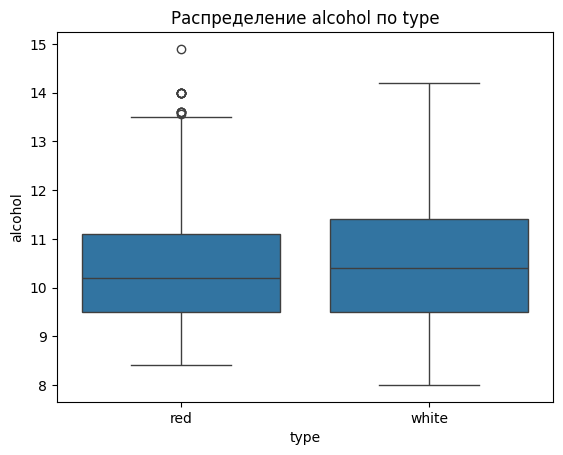

In [107]:
sns.boxplot(data=df, x="type", y="alcohol")
plt.title("Распределение alcohol по type")
plt.show()

***Пояснения***

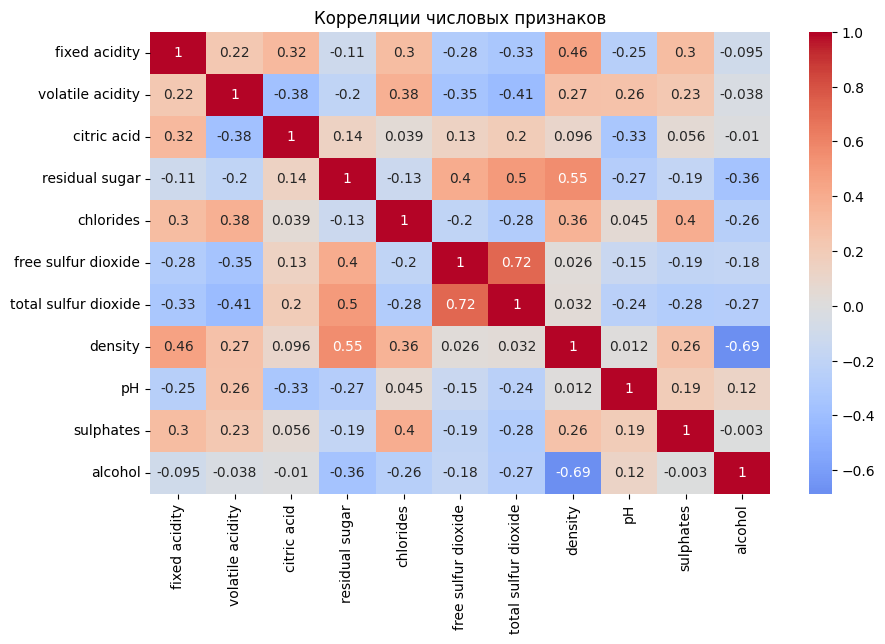

In [108]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Корреляции числовых признаков")
plt.show()


**Корреляции с alcohol:**

* **residual sugar**: −0.36 → чем больше сахара, тем меньше алкоголя.
* **density**: −0.69 → сильная обратная связь, более плотное вино → меньше алкоголя.
* **chlorides**: −0.26 → слабая обратная связь.
* **free sulfur dioxide**: −0.18 → почти нет влияния.
* **total sulfur dioxide**: −0.27 → слабая отрицательная связь.
* **pH**: +0.12 → очень слабая положительная.
* **sulphates**: −0.003 → влияния почти нет.
* **fixed acidity, volatile acidity, citric acid**: связи около нуля → не влияют.

---

**Вывод:**

* На алкоголь сильнее всего влияет **density** (−0.69).
* Средняя связь: **residual sugar** (−0.36).
* Остальные признаки почти не коррелируют.


/tmp/ipython-input-1317274670.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("coolwarm")


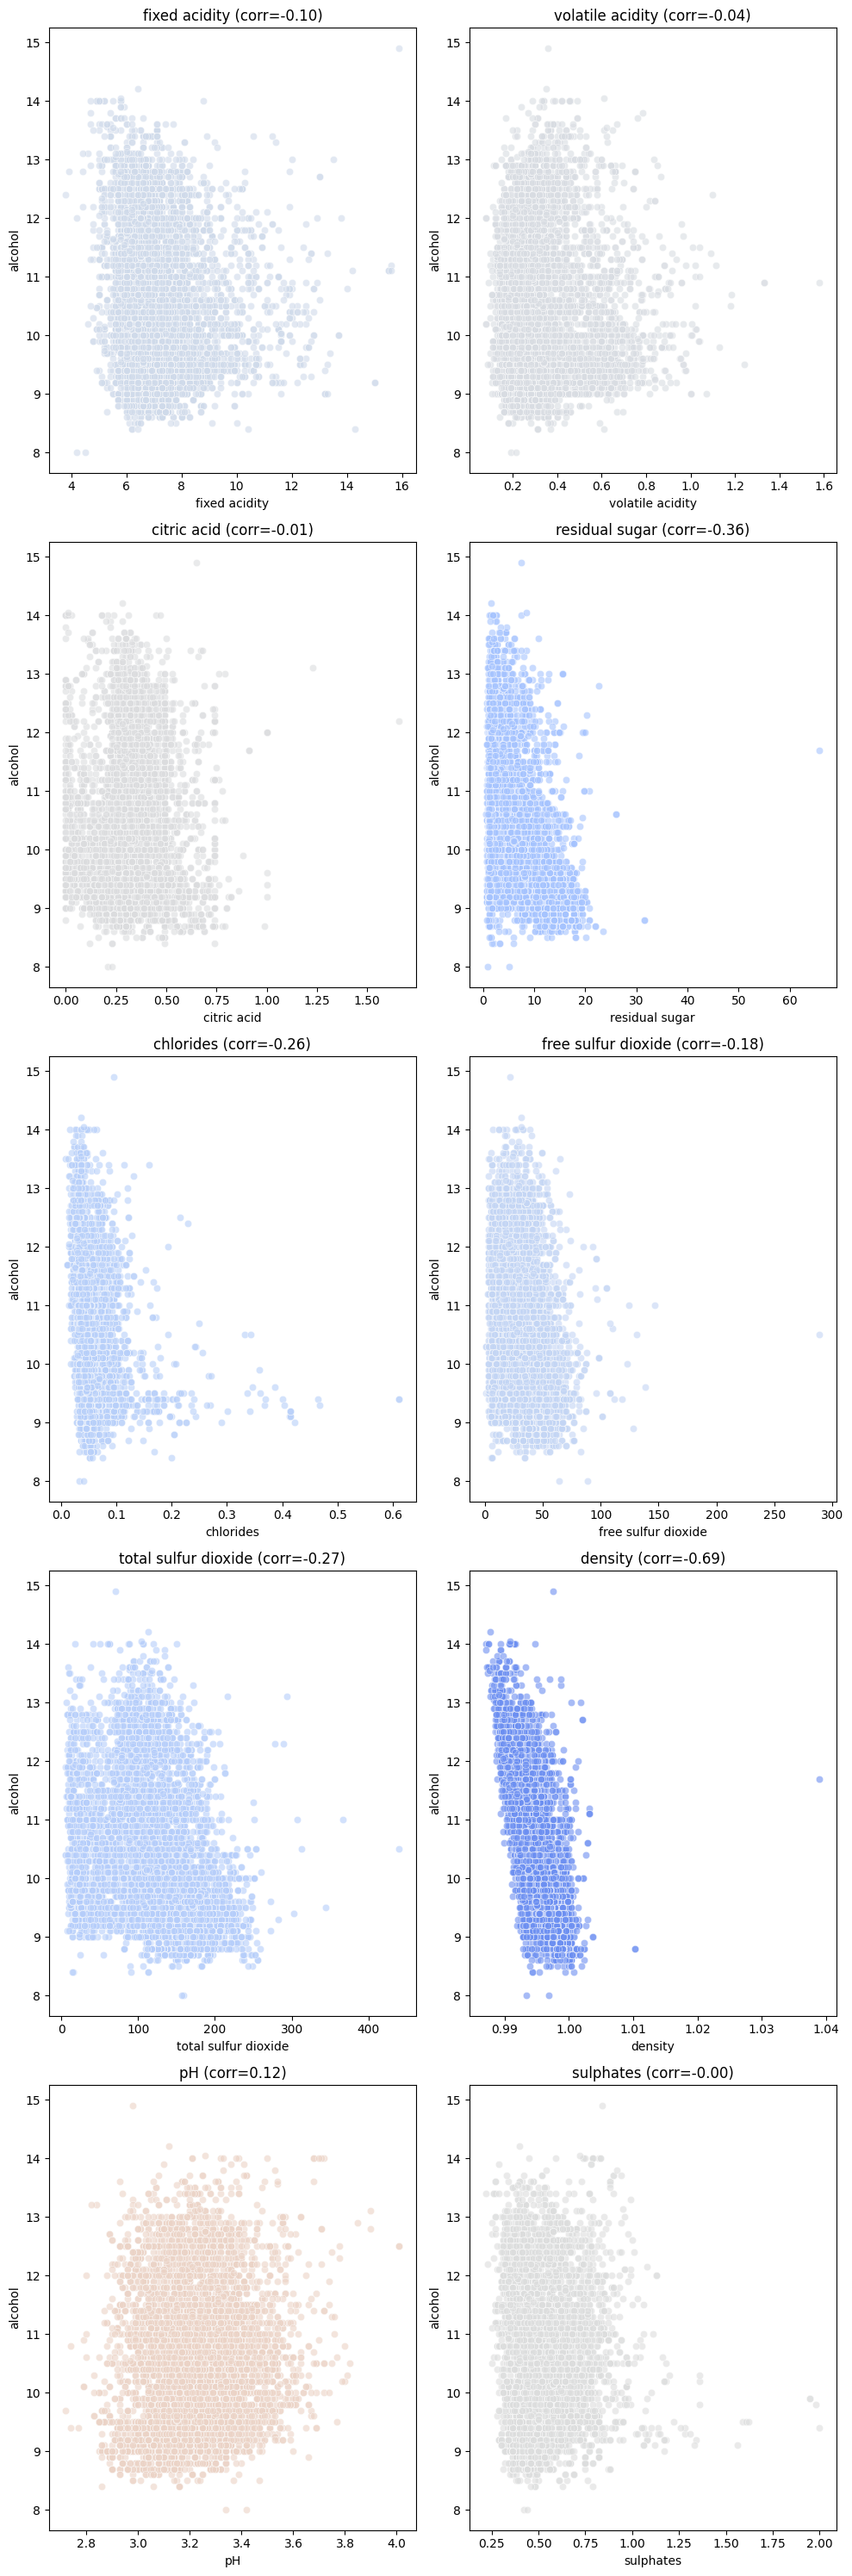

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_features = X_eda.select_dtypes(include="number").columns
n = len(num_features)

# корреляции с alcohol
corrs = df[num_features].corrwith(df["alcohol"])

# палитра (от синего до красного)
cmap = plt.cm.get_cmap("coolwarm")

# сетка графиков (2 в строку)
fig, axes = plt.subplots(nrows=(n+1)//2, ncols=2, figsize=(10, n*3))
axes = axes.flatten()

for i, col in enumerate(num_features):
    corr = corrs[col]
    color = cmap((corr + 1) / 2)   # переводим [-1,1] → [0,1]

    sns.scatterplot(ax=axes[i], data=df, x=col, y="alcohol", color=color, alpha=0.6)
    axes[i].set_title(f"{col} (corr={corr:.2f})")

# удаляем пустые ячейки
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### Попробуем отобрать только важные признаки

In [168]:
categorial_features = ['quality']
numerical_features = ['density', 'residual sugar', 'total sulfur dioxide']

best_features = categorial_features + numerical_features # соединение массивов

X = df[best_features] # обращение к нескольким колонкам
y = df.alcohol

In [169]:
X.head(n=2)

,quality,density,residual sugar,total sulfur dioxide
0,5,0.9978,1.9,34.0
1,5,0.9968,2.6,67.0


In [170]:
y.head()

,alcohol
0,9.4
1,9.8
2,9.8
3,9.8
4,9.4


In [171]:
X_scaled = StandardScaler().fit_transform(X)
pd.DataFrame(X_scaled, columns=X.columns).head(n=3)

,quality,density,residual sugar,total sulfur dioxide
0,-0.93723,1.034993,-0.744778,-1.446359
1,-0.93723,0.701486,-0.597640,-0.862469
2,-0.93723,0.768188,-0.660699,-1.092486


#### Разделение на тестовую и обучающую

Разделение на тестовую и обучающую выборки неободимо для того, чтобы разделить выборку на несколько выборок, данные на которых обучаем и данные на которых тестируем результат.

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест

In [173]:
len(X_train), len(X_test), len(y_train), len(y_test)

(5197, 1300, 5197, 1300)

In [174]:
model = LinearRegression()

In [175]:
model.fit(X_train, y_train)

LinearRegression()

In [176]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [177]:
def calculate_metrics(y_true, y_pred):

  MAE = mean_absolute_error(y_true, y_pred)
  print('MAE %.3f' % MAE)

  MAPE = mean_absolute_percentage_error(y_true, y_pred)
  print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAE, MAE * 100, '%'))

  R2 = r2_score(y_true, y_pred)
  print('R2=%.3f' % R2)

  MSE = mean_squared_error(y_true, y_pred)
  print('MSE=%.3f' % MSE)

  RMSE = root_mean_squared_error(y_true, y_pred)
  print('RMSE=%.3f' % RMSE)

Оценка на выборке на которой обучали необходима для того, чтобы понять насколько наша модель пере/недообучена

In [178]:
print('метрики для выборки на которых обучалась модель')
calculate_metrics(y_train, y_train_pred)

метрики для выборки на которых обучалась модель
MAE 0.575
MAPE=0.575, MAPE_as_percent=57.476%
R2=0.613
MSE=0.550
RMSE=0.741


Оценка на выборке, которую модель никогда не видела, дает объективные представления о том, насколько влияют данные

In [179]:
print('метрики для выборки на которых модель никогда не обучалась')
calculate_metrics(y_test, y_test_pred)

метрики для выборки на которых модель никогда не обучалась
MAE 0.588
MAPE=0.588, MAPE_as_percent=58.849%
R2=0.599
MSE=0.575
RMSE=0.759


In [180]:
model.coef_

array([ 0.25927012, -0.87375082,  0.27264445, -0.42174375])

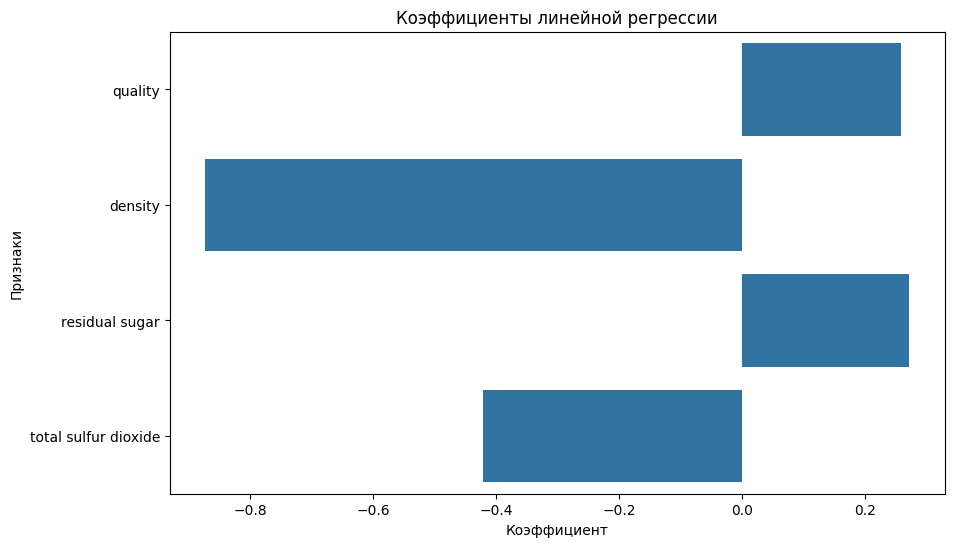

In [183]:

plt.figure(figsize=(10,6))
sns.barplot(x=model.coef_, y=X.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()


Коэффициенты линейной регрессии — это «веса» при признаках, которые показывают, как каждый признак влияет на целевую переменную.

---

**Интерпретация:**

Формула:

$$
y = w_1 x_1 + w_2 x_2 + \ldots + w_n x_n + b
$$

* $w_i$ = коэффициент при признаке $x_i$.
* $b$ = свободный член (intercept).

---

**Что показывают:**

* **Знак ( + / − ):**

  * Положительный → рост признака увеличивает целевую переменную.
  * Отрицательный → рост признака уменьшает целевую переменную.

* **Величина:**

  * Абсолютное значение коэффициента показывает, насколько сильно признак влияет.
  * Больший по модулю коэффициент = более важный признак (если все признаки приведены к одной шкале).

---

**Важно:**

* Если признаки в разных единицах (например, «residual_sugar» и «pH»), коэффициенты напрямую сравнивать нельзя → нужно масштабирование (StandardScaler/MinMaxScaler).
* В противном случае один признак может казаться «важнее» просто потому, что у него большие значения.

#### Борьба с пропусками

In [64]:
import pandas as pd
import numpy as np

np.random.seed(42)

# категории
animals = np.random.choice(['cat', 'dog', None], size=20, p=[0.4, 0.4, 0.2])
ages = np.random.choice([1.5, 2.0, 2.5, 3.0, None], size=20, p=[0.2, 0.3, 0.2, 0.2, 0.1])

df = pd.DataFrame({
    "animal": animals,
    "age": ages
})

df

,animal,age
0,cat,2.5
1,None,1.5
2,dog,2.0
3,dog,2.0
4,cat,2.0
5,cat,3.0
6,cat,1.5
7,None,2.5
8,dog,2.5
9,dog,1.5



**Категориальные признаки (animal)**

* **Удаление строк с пропусками**
  *Когда использовать:* если пропусков мало, и мы можем потерять эти строки без ущерба.
* **Заполнение константой ("unknown")**
  *Когда использовать:* если значение реально может быть «неизвестным» или «прочее».
* **Заполнение модой (самое частое значение)**
  *Когда использовать:* если пропусков много, а один класс сильно доминирует.
* **Предсказание моделью**
  *Когда использовать:* если пропуски большие, и важен этот признак (например, можно обучить классификатор).

---

**Числовые признаки (age)**

* **Удаление строк**
  *Когда использовать:* если пропусков мало.
* **Заполнение средним**
  *Когда использовать:* если распределение нормальное (симметричное).
* **Заполнение медианой**
  *Когда использовать:* если есть выбросы (устойчивее чем среднее).
* **Заполнение 0 или константой**
  *Когда использовать:* если 0 имеет смысл («нет данных» как отдельное состояние).
* **Интерполяция / предсказание моделью**
  *Когда использовать:* если признак важный, а пропусков много (линейная интерполяция или регрессия).

---

**Примеры кода (pandas)**

```python
# Категориальные (animal)
df['animal'].dropna()                       # удалить строки с NaN
df['animal'].fillna('unknown')              # заменить на "unknown"
df['animal'].fillna(df['animal'].mode()[0]) # заменить на моду

# Числовые (age)
df['age'].dropna()                     # удалить строки с NaN
df['age'].fillna(df['age'].mean())     # заменить на среднее
df['age'].fillna(df['age'].median())   # заменить на медиану
df['age'].fillna(0)                    # заменить на 0
df['age'].interpolate(method='linear') # интерполяция
```


In [68]:
df.dropna()

,animal,age
0,cat,2.5
2,dog,2.0
3,dog,2.0
4,cat,2.0
5,cat,3.0
6,cat,1.5
8,dog,2.5
9,dog,1.5
10,cat,2.5
15,cat,3.0


In [66]:
df2_animal = df['animal'].copy().fillna('unknown')
df2 = df.copy()
df2.animal = df2_animal
df2

,animal,age
0,cat,2.5
1,unknown,1.5
2,dog,2.0
3,dog,2.0
4,cat,2.0
5,cat,3.0
6,cat,1.5
7,unknown,2.5
8,dog,2.5
9,dog,1.5


In [67]:
df3_animal_mode = df['animal'].fillna(df['animal'].mode()[0])
df3 = df.copy()
df3.animal = df3_animal_mode
df3

,animal,age
0,cat,2.5
1,cat,1.5
2,dog,2.0
3,dog,2.0
4,cat,2.0
5,cat,3.0
6,cat,1.5
7,cat,2.5
8,dog,2.5
9,dog,1.5


In [69]:
df4_age_mean = df['age'].fillna(df['age'].mean())
df4 = df.copy()
df4.age = df4_age_mean
df4

/tmp/ipython-input-2958849797.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4_age_mean = df['age'].fillna(df['age'].mean())


,animal,age
0,cat,2.500000
1,None,1.500000
2,dog,2.000000
3,dog,2.000000
4,cat,2.000000
5,cat,3.000000
6,cat,1.500000
7,None,2.500000
8,dog,2.500000
9,dog,1.500000


In [71]:
df5_age_mean = df['age'].fillna(df['age'].median())
df5 = df.copy()
df5.age = df5_age_mean
df5

/tmp/ipython-input-271118516.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df5_age_mean = df['age'].fillna(df['age'].median())


,animal,age
0,cat,2.5
1,None,1.5
2,dog,2.0
3,dog,2.0
4,cat,2.0
5,cat,3.0
6,cat,1.5
7,None,2.5
8,dog,2.5
9,dog,1.5
